In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data2d = np.loadtxt('pca_dataset.txt')

##    Plotting the original data 

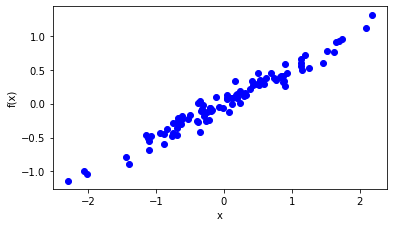

In [3]:
x = data2d[:, 0]
y = data2d[:, 1]
fig, ax = plt.subplots()
ax.plot(x, y, 'bo')

ax.set(xlabel='x', ylabel='f(x)')
ax.set_aspect('equal')
fig.savefig("data11.png")
plt.show()

In [4]:
mean = np.mean(data2d, axis=0)
centered_data2d = data2d-mean

In [5]:
eigenvectors, eigenvalues, V = np.linalg.svd(centered_data2d.T)#.T, full_matrices=False)
projected_data = centered_data2d @ eigenvectors
sigma = projected_data.std(axis=1).mean()

In [6]:
E1 = (eigenvalues[0]/ sum(eigenvalues))*100
print("Energy of first component: ", E1)

E2 = (eigenvalues[1]/ sum(eigenvalues))*100
print("Energy of second component: ", E2)

Energy of first component:  92.3280492599342
Energy of second component:  7.6719507400658085


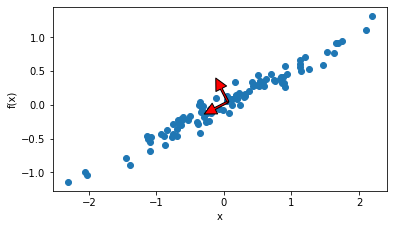

In [7]:
fig, ax = plt.subplots()
ax.scatter(x, y)
for axis in eigenvectors:
    start, end = mean, mean + sigma * axis
    ax.annotate('', xy=end, xycoords='data', xytext=start, textcoords='data', arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
ax.set(xlabel='x', ylabel='f(x)')
fig.savefig("data12.png")
plt.show()

In [8]:
n_sample = data2d.shape[0]
explained_var = eigenvalues**2/(n_sample-1)

In [9]:
print(explained_var)

[0.99870002 0.00689572]


In [10]:
def draw_vector(v0, v1, ax=None):
    ax = plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

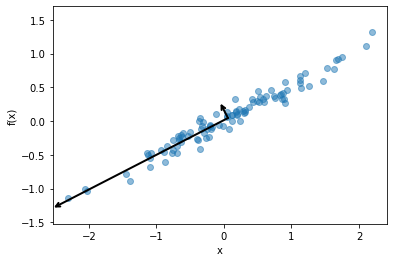

In [11]:
fig, ax1 = plt.subplots()
plt.scatter(data2d[:, 0], data2d[:, 1], alpha=0.5)

for length, vector in zip(explained_var, eigenvectors):
    v = vector *2.9* np.sqrt(length)
    draw_vector(mean, mean + v)
plt.axis('equal');
ax1.set_aspect('equal')
ax1.set(xlabel='x', ylabel='f(x)')
fig.savefig("data13.png")
plt.show()

## Reconstructing the data with k = 1

In [12]:
reconst = np.dot(eigenvectors[:,:1],np.dot(np.diag(eigenvalues[:1]),V[:1,:])).T
reconst += mean

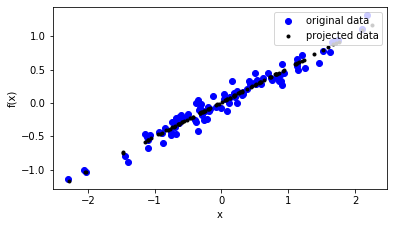

In [13]:
x = data2d[:, 0]
y = data2d[:, 1]
x1 = reconst[:, 0]
y1 = reconst[:, 1]
fig, ax = plt.subplots()
ax.plot(x, y, 'bo', label='original data')
ax.plot(x1, y1, 'k.', label='projected data')

ax.legend(loc='upper right')
ax.set(xlabel='x', ylabel='f(x)')
ax.set_aspect('equal')
fig.savefig("data14.png")
plt.show()